# WINE DATA
Finding the Origin (Class) of Wine 1/2/3
Data Set Information:

These data are the results of a chemical analysis of wines grown in the same region in Italy but derived from three different cultivars. The analysis determined the quantities of 13 constituents found in each of the three types of wines.

Author's Note: I think that the initial data set had around 30 variables, but for some reason I only have the 13 dimensional version. I had a list of what the 30 or so variables were, but a.) I lost it, and b.), I would not know which 13 variables are included in the set.

The attributes are (dontated by Riccardo Leardi, riclea '@' anchem.unige.it )
1) Alcohol
2) Malic acid
3) Ash
4) Alcalinity of ash
5) Magnesium
6) Total phenols
7) Flavanoids
8) Nonflavanoid phenols
9) Proanthocyanins
10)Color intensity
11)Hue
12)OD280/OD315 of diluted wines
13)Proline

In a classification context, this is a well posed problem with "well behaved" class structures. A good data set for first testing of a new classifier, but not very challenging.


Attribute Information:

All attributes are continuous

No statistics available, but suggest to standardise variables for certain uses (e.g. for us with classifiers which are NOT scale invariant)

NOTE: Last attribute is class identifier (1-3)



In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('wine.csv')
df.head(2)

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Class
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1


In [3]:
df.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Class
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,1.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,1.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,1.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,2.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,3.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,3.000000


In [4]:
df.corr()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Class
Alcohol,1.000000,0.094397,0.211545,-0.310235,0.270798,0.289101,0.236815,-0.155929,0.136698,0.546364,-0.071747,0.072343,0.643720,-0.328222
Malic_Acid,0.094397,1.000000,0.164045,0.288500,-0.054575,-0.335167,-0.411007,0.292977,-0.220746,0.248985,-0.561296,-0.368710,-0.192011,0.437776
Ash,0.211545,0.164045,1.000000,0.443367,0.286587,0.128980,0.115077,0.186230,0.009652,0.258887,-0.074667,0.003911,0.223626,-0.049643
Ash_Alcanity,-0.310235,0.288500,0.443367,1.000000,-0.083333,-0.321113,-0.351370,0.361922,-0.197327,0.018732,-0.273955,-0.276769,-0.440597,0.517859
Magnesium,0.270798,-0.054575,0.286587,-0.083333,1.000000,0.214401,0.195784,-0.256294,0.236441,0.199950,0.055398,0.066004,0.393351,-0.209179
Total_Phenols,0.289101,-0.335167,0.128980,-0.321113,0.214401,1.000000,0.864564,-0.449935,0.612413,-0.055136,0.433681,0.699949,0.498115,-0.719163
Flavanoids,0.236815,-0.411007,0.115077,-0.351370,0.195784,0.864564,1.000000,-0.537900,0.652692,-0.172379,0.543479,0.787194,0.494193,-0.847498
Nonflavanoid_Phenols,-0.155929,0.292977,0.186230,0.361922,-0.256294,-0.449935,-0.537900,1.000000,-0.365845,0.139057,-0.262640,-0.503270,-0.311385,0.489109
Proanthocyanins,0.136698,-0.220746,0.009652,-0.197327,0.236441,0.612413,0.652692,-0.365845,1.000000,-0.025250,0.295544,0.519067,0.330417,-0.499130
Color_Intensity,0.546364,0.248985,0.258887,0.018732,0.199950,-0.055136,-0.172379,0.139057,-0.025250,1.000000,-0.521813,-0.428815,0.316100,0.265668


Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
Class                   0
dtype: int64

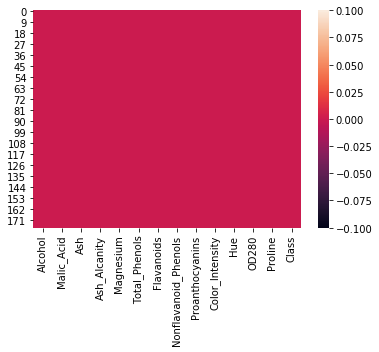

In [5]:
sns.heatmap(df.isnull())
df.isnull().sum()

In [6]:
df.skew()

Alcohol                -0.051482
Malic_Acid              1.039651
Ash                    -0.176699
Ash_Alcanity            0.213047
Magnesium               1.098191
Total_Phenols           0.086639
Flavanoids              0.025344
Nonflavanoid_Phenols    0.450151
Proanthocyanins         0.517137
Color_Intensity         0.868585
Hue                     0.021091
OD280                  -0.307285
Proline                 0.767822
Class                   0.107431
dtype: float64

In [7]:
import numpy as np
for col in df.columns:
    if df.skew().loc[col]>0.55:
        df[col]=np.log1p(df[col])
df.skew()

Alcohol                -0.051482
Malic_Acid              0.529222
Ash                    -0.176699
Ash_Alcanity            0.213047
Magnesium               0.605723
Total_Phenols           0.086639
Flavanoids              0.025344
Nonflavanoid_Phenols    0.450151
Proanthocyanins         0.517137
Color_Intensity         0.097222
Hue                     0.021091
OD280                  -0.307285
Proline                 0.087930
Class                   0.107431
dtype: float64

In [8]:
from scipy.stats import zscore
z_score = abs(zscore(df))
print(df.shape)
df=df[(z_score<3).all(axis=1)]
print(df.shape)

(178, 14)
(170, 14)


In [9]:
df_x=df.drop('Class',axis=1)
y=df['Class']
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(df_x)
x=pd.DataFrame(x,columns=df_x.columns)

In [10]:
x.skew()

Alcohol                -0.030651
Malic_Acid              0.510074
Ash                    -0.243064
Ash_Alcanity            0.094425
Magnesium               0.271262
Total_Phenols           0.111388
Flavanoids             -0.076427
Nonflavanoid_Phenols    0.474603
Proanthocyanins         0.354703
Color_Intensity         0.063903
Hue                    -0.121305
OD280                  -0.279718
Proline                 0.081052
dtype: float64

In [11]:
x.isnull().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64

In [12]:
x.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,1.500539,-0.533113,0.247810,-1.218202,2.094667,0.834514,1.072404,-0.673891,1.364076,0.393144,0.417467,1.862406,1.047243
1,0.200661,-0.450687,-0.945258,-2.626136,0.167501,0.594196,0.766020,-0.835701,-0.529923,-0.177881,0.462687,1.131045,1.013283
2,0.150180,0.161764,1.235176,-0.258247,0.247646,0.834514,1.256234,-0.512081,2.339204,0.409443,0.372246,0.807558,1.302878
3,1.677222,-0.258848,0.535791,-0.834220,1.152422,2.516735,1.511554,-0.997511,1.157799,1.157428,-0.396506,1.201368,1.835200
4,0.251142,0.375765,2.057981,0.509717,1.501600,0.834514,0.694530,0.216064,0.482710,-0.208315,0.417467,0.470007,0.159512


In [13]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: Class, dtype: int64

# Modelling

In [14]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score,roc_curve,roc_auc_score,confusion_matrix,r2_score,mean_squared_error, mean_absolute_error
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier

In [15]:
max_r_score=0
final_rstate=42
for r_state in range (42,101):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=r_state,test_size=0.2)
    model=LogisticRegression()
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    r2score=r2_score(y_test,y_pred)
    if r2score>max_r_score:
        max_r_score=r2score
        final_rstate=r_state
print()
print()
print('max r2_score corresponding to: ',final_rstate,' is: ',max_r_score)
cross_val_score(LogisticRegression(),x,y,cv=10,scoring='r2').mean()



max r2_score corresponding to:  42  is:  1.0


0.9806192511983418

In [16]:
max_r_score=0
final_rstate=42
for r_state in range (42,101):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=r_state,test_size=0.2)
    model=DecisionTreeClassifier(criterion='gini')
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    r2score=r2_score(y_test,y_pred)
    if r2score>max_r_score:
        max_r_score=r2score
        final_rstate=r_state
print()
print()
print('max r2_score corresponding to: ',final_rstate,' is: ',max_r_score)
cross_val_score(DecisionTreeClassifier(),x,y,cv=10,scoring='r2').mean()



max r2_score corresponding to:  55  is:  1.0


0.7471006607073456

In [17]:
from sklearn.svm import SVC
max_r_score=0
final_rstate=42
for r_state in range (42,101):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=r_state,test_size=0.2)
    model=SVC(kernel='poly')
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    r2score=r2_score(y_test,y_pred)
    if r2score>max_r_score:
        max_r_score=r2score
        final_rstate=r_state
print()
print()
print('max r2_score corresponding to: ',final_rstate,' is: ',max_r_score)
cross_val_score(SVC(),x,y,cv=10,scoring='r2').mean()



max r2_score corresponding to:  44  is:  1.0


0.9714794662521052

In [18]:
max_r_score=0
final_rstate=42
from sklearn.naive_bayes import GaussianNB
for r_state in range (42,101):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=r_state,test_size=0.2)
    model=GaussianNB()
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    r2score=r2_score(y_test,y_pred)
    if r2score>max_r_score:
        max_r_score=r2score
        final_rstate=r_state
print()
print()
print('max r2_score corresponding to: ',final_rstate,' is: ',max_r_score)
cross_val_score(GaussianNB(),x,y,cv=10,scoring='r2').mean()



max r2_score corresponding to:  43  is:  1.0


0.9817204301075269

In [19]:
max_r_score=0
final_rstate=42
for r_state in range (42,101):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=r_state,test_size=0.2)
    model=AdaBoostClassifier()
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    r2score=r2_score(y_test,y_pred)
    if r2score>max_r_score:
        max_r_score=r2score
        final_rstate=r_state
print()
print()
print('max r2_score corresponding to: ',final_rstate,' is: ',max_r_score)
cross_val_score(AdaBoostClassifier(),x,y,cv=10,scoring='r2').mean()



max r2_score corresponding to:  55  is:  1.0


0.7888767975126312

In [20]:
max_r_score=0
final_rstate=42
for r_state in range (42,101):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=r_state,test_size=0.2)
    model=RandomForestClassifier()
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    r2score=r2_score(y_test,y_pred)
    if r2score>max_r_score:
        max_r_score=r2score
        final_rstate=r_state
print()
print()
print('max r2_score corresponding to: ',final_rstate,' is: ',max_r_score)
cross_val_score(RandomForestClassifier(),x,y,cv=10,scoring='r2').mean()



max r2_score corresponding to:  42  is:  1.0


0.9703782873429201

In [21]:
max_r_score=0
final_rstate=42
for r_state in range (42,101):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=r_state,test_size=0.2)
    model=GradientBoostingClassifier()
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    r2score=r2_score(y_test,y_pred)
    if r2score>max_r_score:
        max_r_score=r2score
        final_rstate=r_state
print()
print()
print('max r2_score corresponding to: ',final_rstate,' is: ',max_r_score)
cross_val_score(GradientBoostingClassifier(),x,y,cv=10,scoring='r2').mean()



max r2_score corresponding to:  43  is:  1.0


0.877019043917606

In [22]:
max_r_score=0
final_rstate=42
for r_state in range (42,101):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=r_state,test_size=0.2)
    model=KNeighborsClassifier(n_neighbors=10)
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    r2score=r2_score(y_test,y_pred)
    if r2score>max_r_score:
        max_r_score=r2score
        final_rstate=r_state
print()
print()
print('max r2_score corresponding to: ',final_rstate,' is: ',max_r_score)
cross_val_score(KNeighborsClassifier(n_neighbors=10),x,y,cv=10,scoring='r2').mean()



max r2_score corresponding to:  45  is:  1.0


0.9216167897396035

# Best Results with GaussianNB with Random_state = 43  

In [36]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=43,test_size=0.2)
model=GaussianNB()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)

In [37]:
print('r2 Score is:', r2_score(y_test,y_pred))

r2 Score is: 1.0


In [38]:
print('RMSE:',np.sqrt(mean_squared_error(y_test,y_pred)))

RMSE: 0.0


In [40]:
print('Confusion Matrix\n',confusion_matrix(y_test,y_pred))

Confusion Matrix
 [[13  0  0]
 [ 0 15  0]
 [ 0  0  6]]


In [41]:
from sklearn.externals import joblib
joblib.dump(model,'Wine.pkl')

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


['Wine.pkl']

In [ ]:
END